# Spam Message Classification Problem

In [1]:
# Part 1 : import basic package and dataset
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
# check imbalance dataset 
df['label'].value_counts() / (len(df))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [ ]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
# oversampling - ham = 4825, spam = 4825 , total=9650
# undersampling - ham = 747, spam = 747 , total = 1494

In [ ]:
# oversampling method - target is minority class
"""
spam = spam.sample(ham.shape[0], replace=True)
spam.shape, ham.shape
"""

((4825, 4), (4825, 4))

In [ ]:
# undersampling method - target is majority class
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
# my data is balance
# we have to append both the data into one table
data = ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [ ]:
data.head()

,label,message,length,punct
0,ham,"Haha just kidding, papa needs drugs",35,1
1,ham,"Good afternoon, babe. How goes that day ? Any ...",105,16
2,ham,"When people see my msgs, They think Iam addict...",148,11
3,ham,"Aight, can you text me the address?",35,2
4,ham,Nope i'm not drivin... I neva develop da photo...,54,7


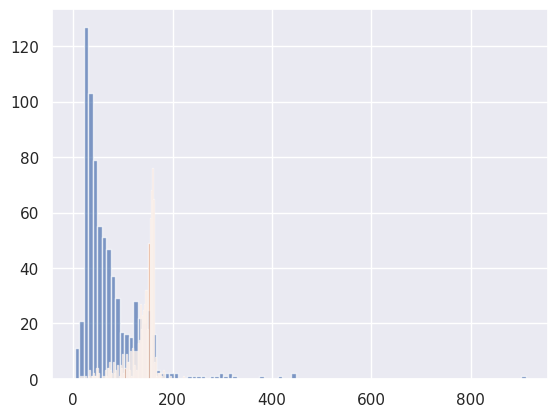

In [ ]:
# Visualization by using ham and spam 

plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

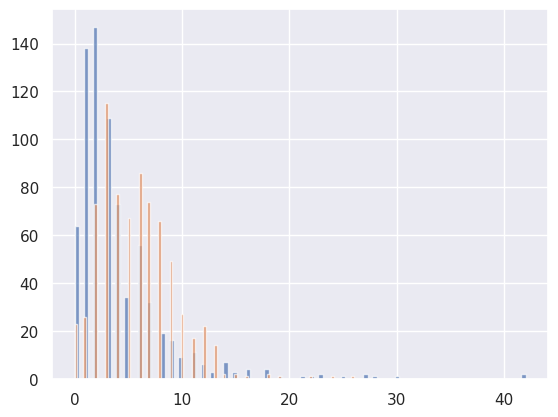

In [ ]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [ ]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [ ]:
# split the data into training and test for building the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                    test_size=0.3, random_state=101)

In [ ]:
data.shape

(1494, 4)

In [ ]:
1494*0.3

448.2

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1045,) (449,) (1045,) (449,)


# Building Classification model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier

# pipeline package to merge nlp and machine learning together and get the output
from sklearn.pipeline import Pipeline 


In [ ]:
TfidfVectorizer()

In [ ]:
classifier = Pipeline([('tfidf',TfidfVectorizer() ), 
                       ('classifier',RandomForestClassifier())])

In [ ]:
classifier

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [ ]:
y_pred_train

array(['spam', 'spam', 'spam', ..., 'ham', 'spam', 'spam'], dtype=object)

In [ ]:
y_pred_test

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ha

# Evaluation metrics
# confusion_matrix, classification_report, accuracy_score



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[223,   3],
       [ 26, 197]])

In [ ]:
print(classification_report(y_train, y_pred_train))
print("******************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       226
        spam       0.98      0.88      0.93       223

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [ ]:
print(accuracy_score(y_train, y_pred_train))
print("******************"*10)
print(accuracy_score(y_test, y_pred_test))

1.0
************************************************************************************************************************************************************************************
0.9354120267260579


In [ ]:
# SOTA - State of the art model - word2vec, BERT

In [ ]:
# Check your model performance

test1 = ['Hello, Hope you are doing well.']
test2 = ['Congratualations, You won a lottery ticket worth $100 Millons ! To claim call @1111']
test3 = ['Hi, hope you all are enjoying with NLP concept and you apply the same concept in your organization']
test4 = ['To claim your prize, simply click on the link below and fill out the form with your personal details. Hurry, this offer is only available to the first 100 people who respond!']
test5 = ['call me at 4 pm jay its urgent']
test6 = ['Congrats Megna ! Shortlisted for Amazing Weekend Getaway , pls come and collect $1000 offer free']
test7= ['Tap to see the discount - Pro Flash Sale - Day1']
test8 = ['Hi, How are you sister, its been a long time. lets have a get together']


In [ ]:
print('test1 : ', classifier.predict(test1))
print('test2 : ', classifier.predict(test2))
print('test3 : ', classifier.predict(test3))
print('test4 : ',classifier.predict(test4))
print('test5 : ',classifier.predict(test5))
print('test6 : ',classifier.predict(test6))
print('test7 : ',classifier.predict(test7))
print('test8 : ',classifier.predict(test8))

test1 :  ['ham']
test2 :  ['spam']
test3 :  ['ham']
test4 :  ['spam']
test5 :  ['ham']
test6 :  ['spam']
test7 :  ['ham']
test8 :  ['ham']


# Naive Bayes Theorem

In [ ]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus

['haha kid papa need drug',
 'good afternoon babe goe day job prospect yet miss love sigh',
 'peopl see msg think iam addict msging wrong bcoz know iam addict sweet friend bslvyl',
 'aight text address',
 'nope drivin neva develop da photo lei',
 'take post come must text happi read one wiv hello carolin end favourit bless',
 'greatest test courag earth bear defeat without lose heart gn tc',
 'add realli care least get dude fuck hey money want',
 'good thing get connect bw',
 'see christmassi',
 'lol oh got friend dog',
 'plz tell an bslvyl sent via fullonsm com',
 'sure neighbor didnt pick',
 'bring got',
 'ah poop look like ill prob send laptop get fix cuz gpu problem',
 'jay say doubl faggot',
 'problem talk later',
 'famili happi',
 'wyli updat weed dealer carlo went freedom class lunsford',
 'si lor juz watch italian job',
 'wondarful song',
 'gorgeou keep pix cum thank',
 'ello babe u ok',
 'ok come n pick u engin',
 'wat r u busi wif work',
 'per request mell mell oru minnaminun

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(corpus).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = pd.get_dummies(data['label'])
y = y.iloc[:,1].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)
y_pred_train_nb = spam_detect_model.predict(x_train)
y_pred_test_nb = spam_detect_model.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_nb))
print("******************"*10)
print(accuracy_score(y_test, y_pred_test_nb))

0.9857740585774059
************************************************************************************************************************************************************************************
0.9464882943143813


In [ ]:
print('test1 : ', spam_detect_model.predict(test1))
print('test2 : ', spam_detect_model.predict(test2))
print('test3 : ', spam_detect_model.predict(test3))
print('test4 : ',spam_detect_model.predict(test4))
print('test5 : ',spam_detect_model.predict(test5))
print('test6 : ',spam_detect_model.predict(test6))
print('test7 : ',spam_detect_model.predict(test7))
print('test8 : ',spam_detect_model.predict(test8))

ValueError: ignored

In [ ]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_rf))
print("******************"*10)
print(accuracy_score(y_test, y_pred_test_rf))

1.0
************************************************************************************************************************************************************************************
0.9364548494983278


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression().fit(x_train, y_train)
y_pred_train_lr = logit.predict(x_train)
y_pred_test_lr = logit.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_lr))
print("******************"*10)
print(accuracy_score(y_test, y_pred_test_lr))

0.9748953974895398
************************************************************************************************************************************************************************************
0.9230769230769231


In [3]:
df.head(1)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9


# BERT Model

# https://jalammar.github.io/illustrated-bert/
# https://jalammar.github.io/illustrated-transformer/
# https://arxiv.org/abs/1706.03762


In [4]:
df['spam'] = df['label'].apply(lambda x:1 if x=='spam' else 0)

In [5]:
df.head()

,label,message,length,punct,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,0
1,ham,Ok lar... Joking wif u oni...,29,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,1
3,ham,U dun say so early hor... U c already then say...,49,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0


In [9]:
df['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['spam'], stratify=df['spam'])

In [7]:
x_train.head()

5261    I absolutely LOVE South Park! I only recently ...
4998                         Esplanade lor. Where else...
3291    My tuition is at 330. Hm we go for the 1120 to...
846     Meanwhile in the shit suite: xavier decided to...
256     Don't necessarily expect it to be done before ...
Name: message, dtype: object

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4179,) (1393,) (4179,) (1393,)


In [11]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.7 MB/s eta 0:00:00


In [12]:
import tensorflow_hub as hub
import tensorflow_text as text

In [13]:
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') 

In [14]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']



In [15]:
get_sentence_embedding(["$500 discount, hurry up!!!", "YOY, you are the champ for this match"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8059573 , -0.5281961 , -0.917793  , ..., -0.69493204,
        -0.78063184,  0.8928221 ],
       [-0.71438736, -0.2916993 , -0.43253002, ..., -0.18625641,
        -0.53961587,  0.79899067]], dtype=float32)>

In [16]:
e = get_sentence_embedding(["banana","grapes", "mango","Geoffrey Hinton","Yaun Lecun",
                            "Elon Musk","Bill Gates"])

In [17]:
e

<tf.Tensor: shape=(7, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219393,  0.4960462 , ...,  0.42165324,
        -0.532214  ,  0.8031217 ],
       [-0.86023223, -0.21242943,  0.49156877, ...,  0.39798015,
        -0.60506296,  0.8447165 ],
       [-0.712886  , -0.15463887,  0.3840176 , ...,  0.35278794,
        -0.5099132 ,  0.73474073],
       ...,
       [-0.88475657, -0.3963472 , -0.7455591 , ..., -0.4634953 ,
        -0.68817234,  0.86344403],
       [-0.75041294, -0.26812574, -0.266895  , ...,  0.02839473,
        -0.5938095 ,  0.7974982 ],
       [-0.7854436 , -0.2994969 ,  0.41027337, ...,  0.52225375,
        -0.49573565,  0.8150751 ]], dtype=float32)>

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [23]:
cosine_similarity([e[3]],[e[4]])

array([[0.96251917]], dtype=float32)

In [24]:
cosine_similarity([e[0]],[e[5]])

array([[0.8933636]], dtype=float32)

In [27]:
import tensorflow as tf
from tensorflow import keras

In [29]:
text_input = keras.layers.Input(shape=(), dtype=tf.string, name='text')

In [30]:
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [32]:
# Functional Model
nlp = keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
nlp = keras.layers.Dense(1, activation='sigmoid', name='output')(nlp)

model = keras.Model(inputs=[text_input], outputs=[nlp])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
131/131 [==============================] - 74s 487ms/step - loss: 0.3178 - accuracy: 0.8701 - val_loss: 0.2352 - val_accuracy: 0.8794
Epoch 2/10
131/131 [==============================] - 57s 434ms/step - loss: 0.2354 - accuracy: 0.8993 - val_loss: 0.1838 - val_accuracy: 0.9347
Epoch 3/10
131/131 [==============================] - 64s 492ms/step - loss: 0.1950 - accuracy: 0.9239 - val_loss: 0.1596 - val_accuracy: 0.9375
Epoch 4/10
131/131 [==============================] - 64s 491ms/step - loss: 0.1745 - accuracy: 0.9342 - val_loss: 0.1418 - val_accuracy: 0.9426
Epoch 5/10
131/131 [==============================] - 64s 488ms/step - loss: 0.1558 - accuracy: 0.9428 - val_loss: 0.1262 - val_accuracy: 0.9584
Epoch 6/10
131/131 [==============================] - 64s 488ms/step - loss: 0.1459 - accuracy: 0.9493 - val_loss: 0.1147 - val_accuracy: 0.9677
Epoch 7/10
131/131 [==============================] - 64s 493ms/step - loss: 0.1354 - accuracy: 0.9569 - val_loss: 0.1070 - val_ac